SKRIPSI

# Import library

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
import nltk
import csv 
from nltk import ngrams
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, validation_curve,RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from matplotlib_venn import venn2
from time import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

np.random.seed(0)
stopwords = nltk.corpus.stopwords.words('english')
poster_Stemmer = nltk.PorterStemmer()


# Baca file csv

In [2]:
#baca csv
data_train_amazon = pd.read_csv('Amazon_Train.csv')
data_train_yelp = pd.read_csv('Yelp_Train.csv')
data_test_amazon = pd.read_csv('Amazon_Test.csv')
data_test_yelp = pd.read_csv('Yelp_Test.csv')

In [3]:
print(data_train_amazon.head())
print("\n")
print(data_train_yelp.head())

   Label                                           Sentimen
0      0  Buyer beware This is a self-published book, an...
1      0  The Worst! A complete waste of time. Typograph...
2      0  Oh please I guess you have to be a romance nov...
3      0  Awful beyond belief! I feel I have to write to...
4      0  Another Abysmal Digital Copy Rather than scrat...


   Label                                           Sentimen
0      0  I don't know what Dr. Goldberg was like before...
1      0  I'm writing this review to give you a heads up...
2      0  Owning a driving range inside the city limits ...
3      0  This place is absolute garbage...  Half of the...
4      0  Used to go there for tires, brakes, etc.  Thei...


In [4]:
print(data_test_amazon.head())
print("\n")
print(data_test_yelp.head())

   Label                                           Sentimen
0      0  Overly complicated Being both a U.S. history b...
1      0  Terrible Disappointment -- parts don't fit My ...
2      0  Didn't hold up.....very disappointed I bought ...
3      0  gene hates jezebel i love JLJ but this compila...
4      0  Nice toy but ... My six-year-old loves space a...


   Label                                           Sentimen
0      0  My wife and I used to love Arriba's, til recen...
1      0  You get what you pay for.  The food is inexpen...
2      0  Unfortunately, yesterday's visit was one of th...
3      0  I went into the Scottsdale location yesterday....
4      0  It takes a lot for me to write a review and bl...


# Preprocessing ke lowercase

In [5]:
iterator = 0
data_Preprocessing_Amazon_Train = data_train_amazon
data_Lowercase_Amazon_Train = []

data_Preprocessing_Yelp_Train = data_train_yelp
data_Lowercase_Yelp_Train = []

while iterator < len(data_train_amazon) :
    data_Lowercase_Amazon_Train.append(data_train_amazon.Sentimen[iterator].lower())
    iterator = iterator + 1

iterator = 0

while iterator < len(data_train_yelp) :
    data_Lowercase_Yelp_Train.append(data_train_yelp.Sentimen[iterator].lower())
    iterator = iterator + 1
    

In [6]:
iterator = 0
data_Preprocessing_Amazon_Test = data_test_amazon
data_Lowercase_Amazon_Test = []

data_Preprocessing_Yelp_Test = data_test_yelp
data_Lowercase_Yelp_Test = []

while iterator < len(data_test_amazon) :
    data_Lowercase_Amazon_Test.append(data_test_amazon.Sentimen[iterator].lower())
    iterator = iterator + 1

iterator = 0

while iterator < len(data_test_yelp) :
    data_Lowercase_Yelp_Test.append(data_test_yelp.Sentimen[iterator].lower())
    iterator = iterator + 1

In [7]:
data_Preprocessing_Amazon_Train['Lowercase'] = data_Lowercase_Amazon_Train
data_Preprocessing_Amazon_Train.head()

,Label,Sentimen,Lowercase
0,0,"Buyer beware This is a self-published book, an...","buyer beware this is a self-published book, an..."
1,0,The Worst! A complete waste of time. Typograph...,the worst! a complete waste of time. typograph...
2,0,Oh please I guess you have to be a romance nov...,oh please i guess you have to be a romance nov...
3,0,Awful beyond belief! I feel I have to write to...,awful beyond belief! i feel i have to write to...
4,0,Another Abysmal Digital Copy Rather than scrat...,another abysmal digital copy rather than scrat...


In [8]:
data_Preprocessing_Amazon_Test['Lowercase'] = data_Lowercase_Amazon_Test
data_Preprocessing_Amazon_Test.head()

,Label,Sentimen,Lowercase
0,0,Overly complicated Being both a U.S. history b...,overly complicated being both a u.s. history b...
1,0,Terrible Disappointment -- parts don't fit My ...,terrible disappointment -- parts don't fit my ...
2,0,Didn't hold up.....very disappointed I bought ...,didn't hold up.....very disappointed i bought ...
3,0,gene hates jezebel i love JLJ but this compila...,gene hates jezebel i love jlj but this compila...
4,0,Nice toy but ... My six-year-old loves space a...,nice toy but ... my six-year-old loves space a...


In [9]:
data_Preprocessing_Yelp_Train['Lowercase'] = data_Lowercase_Yelp_Train
data_Preprocessing_Yelp_Train.head()

,Label,Sentimen,Lowercase
0,0,I don't know what Dr. Goldberg was like before...,i don't know what dr. goldberg was like before...
1,0,I'm writing this review to give you a heads up...,i'm writing this review to give you a heads up...
2,0,Owning a driving range inside the city limits ...,owning a driving range inside the city limits ...
3,0,This place is absolute garbage... Half of the...,this place is absolute garbage... half of the...
4,0,"Used to go there for tires, brakes, etc. Thei...","used to go there for tires, brakes, etc. thei..."


In [10]:
data_Preprocessing_Yelp_Test['Lowercase'] = data_Lowercase_Yelp_Test
data_Preprocessing_Yelp_Test.head()

,Label,Sentimen,Lowercase
0,0,"My wife and I used to love Arriba's, til recen...","my wife and i used to love arriba's, til recen..."
1,0,You get what you pay for. The food is inexpen...,you get what you pay for. the food is inexpen...
2,0,"Unfortunately, yesterday's visit was one of th...","unfortunately, yesterday's visit was one of th..."
3,0,I went into the Scottsdale location yesterday....,i went into the scottsdale location yesterday....
4,0,It takes a lot for me to write a review and bl...,it takes a lot for me to write a review and bl...


# Menghilangkan angka

In [11]:
iterator = 0
data_RemoveNumber_Amazon_Train = []

data_RemoveNumber_Yelp_Train = []

while iterator < len(data_Preprocessing_Amazon_Train) :
    data_RemoveNumber_Amazon_Train.append(re.sub(r"\d+", "",data_Preprocessing_Amazon_Train.Lowercase[iterator]))
    iterator = iterator + 1

iterator = 0

while iterator < len(data_Preprocessing_Yelp_Train) :
    data_RemoveNumber_Yelp_Train.append(re.sub(r"\d+", "",data_Preprocessing_Yelp_Train.Lowercase[iterator]))
    iterator = iterator + 1

In [12]:
iterator = 0
data_RemoveNumber_Amazon_Test = []

data_RemoveNumber_Yelp_Test = []

while iterator < len(data_Preprocessing_Amazon_Test) :
    data_RemoveNumber_Amazon_Test.append(re.sub(r"\d+", "",data_Preprocessing_Amazon_Test.Lowercase[iterator]))
    iterator = iterator + 1

iterator = 0

while iterator < len(data_Preprocessing_Yelp_Test) :
    data_RemoveNumber_Yelp_Test.append(re.sub(r"\d+", "",data_Preprocessing_Yelp_Test.Lowercase[iterator]))
    iterator = iterator + 1

In [13]:
data_Preprocessing_Amazon_Train['RemoveNumber'] = data_RemoveNumber_Amazon_Train
data_Preprocessing_Amazon_Train.head()

,Label,Sentimen,Lowercase,RemoveNumber
0,0,"Buyer beware This is a self-published book, an...","buyer beware this is a self-published book, an...","buyer beware this is a self-published book, an..."
1,0,The Worst! A complete waste of time. Typograph...,the worst! a complete waste of time. typograph...,the worst! a complete waste of time. typograph...
2,0,Oh please I guess you have to be a romance nov...,oh please i guess you have to be a romance nov...,oh please i guess you have to be a romance nov...
3,0,Awful beyond belief! I feel I have to write to...,awful beyond belief! i feel i have to write to...,awful beyond belief! i feel i have to write to...
4,0,Another Abysmal Digital Copy Rather than scrat...,another abysmal digital copy rather than scrat...,another abysmal digital copy rather than scrat...


In [14]:
data_Preprocessing_Amazon_Test['RemoveNumber'] = data_RemoveNumber_Amazon_Test
data_Preprocessing_Amazon_Test.head()

,Label,Sentimen,Lowercase,RemoveNumber
0,0,Overly complicated Being both a U.S. history b...,overly complicated being both a u.s. history b...,overly complicated being both a u.s. history b...
1,0,Terrible Disappointment -- parts don't fit My ...,terrible disappointment -- parts don't fit my ...,terrible disappointment -- parts don't fit my ...
2,0,Didn't hold up.....very disappointed I bought ...,didn't hold up.....very disappointed i bought ...,didn't hold up.....very disappointed i bought ...
3,0,gene hates jezebel i love JLJ but this compila...,gene hates jezebel i love jlj but this compila...,gene hates jezebel i love jlj but this compila...
4,0,Nice toy but ... My six-year-old loves space a...,nice toy but ... my six-year-old loves space a...,nice toy but ... my six-year-old loves space a...


In [15]:
data_Preprocessing_Yelp_Train['RemoveNumber'] = data_RemoveNumber_Yelp_Train
data_Preprocessing_Yelp_Train.head()

,Label,Sentimen,Lowercase,RemoveNumber
0,0,I don't know what Dr. Goldberg was like before...,i don't know what dr. goldberg was like before...,i don't know what dr. goldberg was like before...
1,0,I'm writing this review to give you a heads up...,i'm writing this review to give you a heads up...,i'm writing this review to give you a heads up...
2,0,Owning a driving range inside the city limits ...,owning a driving range inside the city limits ...,owning a driving range inside the city limits ...
3,0,This place is absolute garbage... Half of the...,this place is absolute garbage... half of the...,this place is absolute garbage... half of the...
4,0,"Used to go there for tires, brakes, etc. Thei...","used to go there for tires, brakes, etc. thei...","used to go there for tires, brakes, etc. thei..."


In [16]:
data_Preprocessing_Yelp_Test['RemoveNumber'] = data_RemoveNumber_Yelp_Test
data_Preprocessing_Yelp_Test.head()

,Label,Sentimen,Lowercase,RemoveNumber
0,0,"My wife and I used to love Arriba's, til recen...","my wife and i used to love arriba's, til recen...","my wife and i used to love arriba's, til recen..."
1,0,You get what you pay for. The food is inexpen...,you get what you pay for. the food is inexpen...,you get what you pay for. the food is inexpen...
2,0,"Unfortunately, yesterday's visit was one of th...","unfortunately, yesterday's visit was one of th...","unfortunately, yesterday's visit was one of th..."
3,0,I went into the Scottsdale location yesterday....,i went into the scottsdale location yesterday....,i went into the scottsdale location yesterday....
4,0,It takes a lot for me to write a review and bl...,it takes a lot for me to write a review and bl...,it takes a lot for me to write a review and bl...


# Menghilangkan tanda baca

In [17]:
iterator = 0
data_RemovePunctuation_Amazon_Train = []

data_RemovePunctuation_Yelp_Train = []

while iterator < len(data_Preprocessing_Amazon_Train) :
    data_RemovePunctuation_Amazon_Train.append(data_Preprocessing_Amazon_Train.RemoveNumber[iterator].translate(str.maketrans('','', string.punctuation)))
    iterator = iterator + 1

iterator = 0

while iterator < len(data_Preprocessing_Yelp_Train) :
    data_RemovePunctuation_Yelp_Train.append(data_Preprocessing_Yelp_Train.RemoveNumber[iterator].translate(str.maketrans('','', string.punctuation)))
    iterator = iterator + 1

In [18]:
iterator = 0
data_RemovePunctuation_Amazon_Test = []

data_RemovePunctuation_Yelp_Test = []

while iterator < len(data_Preprocessing_Amazon_Test) :
    data_RemovePunctuation_Amazon_Test.append(data_Preprocessing_Amazon_Test.RemoveNumber[iterator].translate(str.maketrans('','', string.punctuation)))
    iterator = iterator + 1

iterator = 0

while iterator < len(data_Preprocessing_Yelp_Test) :
    data_RemovePunctuation_Yelp_Test.append(data_Preprocessing_Yelp_Test.RemoveNumber[iterator].translate(str.maketrans('','', string.punctuation)))
    iterator = iterator + 1

In [19]:
data_Preprocessing_Amazon_Train['RemovePunctuation'] = data_RemovePunctuation_Amazon_Train
data_Preprocessing_Amazon_Train.head()

,Label,Sentimen,Lowercase,RemoveNumber,RemovePunctuation
0,0,"Buyer beware This is a self-published book, an...","buyer beware this is a self-published book, an...","buyer beware this is a self-published book, an...",buyer beware this is a selfpublished book and ...
1,0,The Worst! A complete waste of time. Typograph...,the worst! a complete waste of time. typograph...,the worst! a complete waste of time. typograph...,the worst a complete waste of time typographic...
2,0,Oh please I guess you have to be a romance nov...,oh please i guess you have to be a romance nov...,oh please i guess you have to be a romance nov...,oh please i guess you have to be a romance nov...
3,0,Awful beyond belief! I feel I have to write to...,awful beyond belief! i feel i have to write to...,awful beyond belief! i feel i have to write to...,awful beyond belief i feel i have to write to ...
4,0,Another Abysmal Digital Copy Rather than scrat...,another abysmal digital copy rather than scrat...,another abysmal digital copy rather than scrat...,another abysmal digital copy rather than scrat...


In [20]:
data_Preprocessing_Amazon_Test['RemovePunctuation'] = data_RemovePunctuation_Amazon_Test
data_Preprocessing_Amazon_Test.head()

,Label,Sentimen,Lowercase,RemoveNumber,RemovePunctuation
0,0,Overly complicated Being both a U.S. history b...,overly complicated being both a u.s. history b...,overly complicated being both a u.s. history b...,overly complicated being both a us history buf...
1,0,Terrible Disappointment -- parts don't fit My ...,terrible disappointment -- parts don't fit my ...,terrible disappointment -- parts don't fit my ...,terrible disappointment parts dont fit my son...
2,0,Didn't hold up.....very disappointed I bought ...,didn't hold up.....very disappointed i bought ...,didn't hold up.....very disappointed i bought ...,didnt hold upvery disappointed i bought this o...
3,0,gene hates jezebel i love JLJ but this compila...,gene hates jezebel i love jlj but this compila...,gene hates jezebel i love jlj but this compila...,gene hates jezebel i love jlj but this compila...
4,0,Nice toy but ... My six-year-old loves space a...,nice toy but ... my six-year-old loves space a...,nice toy but ... my six-year-old loves space a...,nice toy but my sixyearold loves space and to...


In [21]:
data_Preprocessing_Yelp_Train['RemovePunctuation'] = data_RemovePunctuation_Yelp_Train
data_Preprocessing_Yelp_Train.head()

,Label,Sentimen,Lowercase,RemoveNumber,RemovePunctuation
0,0,I don't know what Dr. Goldberg was like before...,i don't know what dr. goldberg was like before...,i don't know what dr. goldberg was like before...,i dont know what dr goldberg was like before ...
1,0,I'm writing this review to give you a heads up...,i'm writing this review to give you a heads up...,i'm writing this review to give you a heads up...,im writing this review to give you a heads up ...
2,0,Owning a driving range inside the city limits ...,owning a driving range inside the city limits ...,owning a driving range inside the city limits ...,owning a driving range inside the city limits ...
3,0,This place is absolute garbage... Half of the...,this place is absolute garbage... half of the...,this place is absolute garbage... half of the...,this place is absolute garbage half of the te...
4,0,"Used to go there for tires, brakes, etc. Thei...","used to go there for tires, brakes, etc. thei...","used to go there for tires, brakes, etc. thei...",used to go there for tires brakes etc their p...


In [22]:
data_Preprocessing_Yelp_Test['RemovePunctuation'] = data_RemovePunctuation_Yelp_Test
data_Preprocessing_Yelp_Test.head()

,Label,Sentimen,Lowercase,RemoveNumber,RemovePunctuation
0,0,"My wife and I used to love Arriba's, til recen...","my wife and i used to love arriba's, til recen...","my wife and i used to love arriba's, til recen...",my wife and i used to love arribas til recentl...
1,0,You get what you pay for. The food is inexpen...,you get what you pay for. the food is inexpen...,you get what you pay for. the food is inexpen...,you get what you pay for the food is inexpens...
2,0,"Unfortunately, yesterday's visit was one of th...","unfortunately, yesterday's visit was one of th...","unfortunately, yesterday's visit was one of th...",unfortunately yesterdays visit was one of the ...
3,0,I went into the Scottsdale location yesterday....,i went into the scottsdale location yesterday....,i went into the scottsdale location yesterday....,i went into the scottsdale location yesterday ...
4,0,It takes a lot for me to write a review and bl...,it takes a lot for me to write a review and bl...,it takes a lot for me to write a review and bl...,it takes a lot for me to write a review and bl...


# Menghilangkan Non alfabet

In [23]:
iterator = 0

data_Regex_alpabet_only_Amazon_Train = []

data_Regex_alpabet_only_Yelp_Train = []


while iterator < len(data_Preprocessing_Amazon_Train) :
    data_Regex_alpabet_only_Amazon_Train.append(" ".join(re.findall("[a-zA-Z]+", data_Preprocessing_Amazon_Train.RemovePunctuation[iterator])))
    iterator = iterator + 1

iterator = 0

while iterator < len(data_Preprocessing_Yelp_Train) :
    data_Regex_alpabet_only_Yelp_Train.append(" ".join(re.findall(r"[a-zA-Z]+", data_Preprocessing_Yelp_Train.RemovePunctuation[iterator])))
    iterator = iterator + 1



In [24]:
iterator = 0

data_Regex_alpabet_only_Amazon_Test = []

data_Regex_alpabet_only_Yelp_Test = []


while iterator < len(data_Preprocessing_Amazon_Test) :
    data_Regex_alpabet_only_Amazon_Test.append(" ".join(re.findall("[a-zA-Z]+", data_Preprocessing_Amazon_Test.RemovePunctuation[iterator])))
    iterator = iterator + 1

iterator = 0

while iterator < len(data_Preprocessing_Yelp_Test) :
    data_Regex_alpabet_only_Yelp_Test.append(" ".join(re.findall(r"[a-zA-Z]+", data_Preprocessing_Yelp_Test.RemovePunctuation[iterator])))
    iterator = iterator + 1

In [25]:
data_Preprocessing_Amazon_Train['Regex'] = data_Regex_alpabet_only_Amazon_Train
data_Preprocessing_Amazon_Train.head()

,Label,Sentimen,Lowercase,RemoveNumber,RemovePunctuation,Regex
0,0,"Buyer beware This is a self-published book, an...","buyer beware this is a self-published book, an...","buyer beware this is a self-published book, an...",buyer beware this is a selfpublished book and ...,buyer beware this is a selfpublished book and ...
1,0,The Worst! A complete waste of time. Typograph...,the worst! a complete waste of time. typograph...,the worst! a complete waste of time. typograph...,the worst a complete waste of time typographic...,the worst a complete waste of time typographic...
2,0,Oh please I guess you have to be a romance nov...,oh please i guess you have to be a romance nov...,oh please i guess you have to be a romance nov...,oh please i guess you have to be a romance nov...,oh please i guess you have to be a romance nov...
3,0,Awful beyond belief! I feel I have to write to...,awful beyond belief! i feel i have to write to...,awful beyond belief! i feel i have to write to...,awful beyond belief i feel i have to write to ...,awful beyond belief i feel i have to write to ...
4,0,Another Abysmal Digital Copy Rather than scrat...,another abysmal digital copy rather than scrat...,another abysmal digital copy rather than scrat...,another abysmal digital copy rather than scrat...,another abysmal digital copy rather than scrat...


In [26]:
data_Preprocessing_Amazon_Test['Regex'] = data_Regex_alpabet_only_Amazon_Test
data_Preprocessing_Amazon_Test.head()

,Label,Sentimen,Lowercase,RemoveNumber,RemovePunctuation,Regex
0,0,Overly complicated Being both a U.S. history b...,overly complicated being both a u.s. history b...,overly complicated being both a u.s. history b...,overly complicated being both a us history buf...,overly complicated being both a us history buf...
1,0,Terrible Disappointment -- parts don't fit My ...,terrible disappointment -- parts don't fit my ...,terrible disappointment -- parts don't fit my ...,terrible disappointment parts dont fit my son...,terrible disappointment parts dont fit my son ...
2,0,Didn't hold up.....very disappointed I bought ...,didn't hold up.....very disappointed i bought ...,didn't hold up.....very disappointed i bought ...,didnt hold upvery disappointed i bought this o...,didnt hold upvery disappointed i bought this o...
3,0,gene hates jezebel i love JLJ but this compila...,gene hates jezebel i love jlj but this compila...,gene hates jezebel i love jlj but this compila...,gene hates jezebel i love jlj but this compila...,gene hates jezebel i love jlj but this compila...
4,0,Nice toy but ... My six-year-old loves space a...,nice toy but ... my six-year-old loves space a...,nice toy but ... my six-year-old loves space a...,nice toy but my sixyearold loves space and to...,nice toy but my sixyearold loves space and to ...


In [27]:
data_Preprocessing_Yelp_Train['Regex'] = data_Regex_alpabet_only_Yelp_Train
data_Preprocessing_Yelp_Train.head()

,Label,Sentimen,Lowercase,RemoveNumber,RemovePunctuation,Regex
0,0,I don't know what Dr. Goldberg was like before...,i don't know what dr. goldberg was like before...,i don't know what dr. goldberg was like before...,i dont know what dr goldberg was like before ...,i dont know what dr goldberg was like before m...
1,0,I'm writing this review to give you a heads up...,i'm writing this review to give you a heads up...,i'm writing this review to give you a heads up...,im writing this review to give you a heads up ...,im writing this review to give you a heads up ...
2,0,Owning a driving range inside the city limits ...,owning a driving range inside the city limits ...,owning a driving range inside the city limits ...,owning a driving range inside the city limits ...,owning a driving range inside the city limits ...
3,0,This place is absolute garbage... Half of the...,this place is absolute garbage... half of the...,this place is absolute garbage... half of the...,this place is absolute garbage half of the te...,this place is absolute garbage half of the tee...
4,0,"Used to go there for tires, brakes, etc. Thei...","used to go there for tires, brakes, etc. thei...","used to go there for tires, brakes, etc. thei...",used to go there for tires brakes etc their p...,used to go there for tires brakes etc their pr...


In [28]:
data_Preprocessing_Yelp_Test['Regex'] = data_Regex_alpabet_only_Yelp_Test
data_Preprocessing_Yelp_Test.head()

,Label,Sentimen,Lowercase,RemoveNumber,RemovePunctuation,Regex
0,0,"My wife and I used to love Arriba's, til recen...","my wife and i used to love arriba's, til recen...","my wife and i used to love arriba's, til recen...",my wife and i used to love arribas til recentl...,my wife and i used to love arribas til recentl...
1,0,You get what you pay for. The food is inexpen...,you get what you pay for. the food is inexpen...,you get what you pay for. the food is inexpen...,you get what you pay for the food is inexpens...,you get what you pay for the food is inexpensi...
2,0,"Unfortunately, yesterday's visit was one of th...","unfortunately, yesterday's visit was one of th...","unfortunately, yesterday's visit was one of th...",unfortunately yesterdays visit was one of the ...,unfortunately yesterdays visit was one of the ...
3,0,I went into the Scottsdale location yesterday....,i went into the scottsdale location yesterday....,i went into the scottsdale location yesterday....,i went into the scottsdale location yesterday ...,i went into the scottsdale location yesterday ...
4,0,It takes a lot for me to write a review and bl...,it takes a lot for me to write a review and bl...,it takes a lot for me to write a review and bl...,it takes a lot for me to write a review and bl...,it takes a lot for me to write a review and bl...


In [29]:
Clean_Amazon_Sentiment_Train = data_Preprocessing_Amazon_Train['Regex']
Clean_Yelp_Sentiment_Train = data_Preprocessing_Yelp_Train['Regex']
Label_Amazon_Train = data_Preprocessing_Amazon_Train['Label']
Label_Yelp_Train = data_Preprocessing_Yelp_Train['Label']

Clean_Amazon_Sentiment_Test = data_Preprocessing_Amazon_Test['Regex']
Clean_Yelp_Sentiment_Test = data_Preprocessing_Yelp_Test['Regex']
Label_Amazon_Test = data_Preprocessing_Amazon_Test['Label']
Label_Yelp_Test = data_Preprocessing_Yelp_Test['Label']

In [30]:
# tf = tfidfvectorizer()
# tf.fit(train)
# trainx = tf.transform(train)
# testx = tf.transform(test)

vectorizer_Amazon = TfidfVectorizer(ngram_range=(2,3), analyzer = 'char')
vectorizer_Amazon.fit(Clean_Amazon_Sentiment_Train)
Data_Train_Amazon = vectorizer_Amazon.transform(Clean_Amazon_Sentiment_Train).toarray()
Vocabulary_Train_Amazon = vectorizer_Amazon.get_feature_names()
Data_Test_Amazon = vectorizer_Amazon.transform(Clean_Amazon_Sentiment_Test).toarray()

vectorizer_Yelp = TfidfVectorizer(ngram_range=(2,3),analyzer = 'char' )
vectorizer_Yelp.fit(Clean_Yelp_Sentiment_Train)
Data_Train_Yelp = vectorizer_Yelp.transform(Clean_Yelp_Sentiment_Train).toarray()
Vocabulary_Train_Yelp = vectorizer_Yelp.get_feature_names()
Data_Test_Yelp = vectorizer_Yelp.transform(Clean_Yelp_Sentiment_Test).toarray()

In [31]:
DataFrame_Amazon_Train = pd.DataFrame(Data_Train_Amazon, columns = Vocabulary_Train_Amazon)
print (DataFrame_Amazon_Train)

             a        a    aa        ab        ac        ad   ae        af  \
0     0.174884  0.079896  0.0  0.000000  0.000000  0.000000  0.0  0.000000   
1     0.149341  0.046906  0.0  0.044125  0.052581  0.055971  0.0  0.000000   
2     0.122904  0.056149  0.0  0.026410  0.000000  0.000000  0.0  0.033775   
3     0.107078  0.041393  0.0  0.000000  0.000000  0.000000  0.0  0.000000   
4     0.121365  0.022871  0.0  0.014344  0.017092  0.000000  0.0  0.000000   
...        ...       ...  ...       ...       ...       ...  ...       ...   
7495  0.082949  0.014887  0.0  0.000000  0.000000  0.000000  0.0  0.000000   
7496  0.119551  0.033377  0.0  0.000000  0.000000  0.000000  0.0  0.000000   
7497  0.139474  0.087614  0.0  0.029971  0.000000  0.000000  0.0  0.000000   
7498  0.103292  0.000000  0.0  0.000000  0.072736  0.000000  0.0  0.000000   
7499  0.040737  0.000000  0.0  0.000000  0.000000  0.000000  0.0  0.000000   

            ag   ah  ...  zzf  zzi  zzk  zzl  zzo  zzs  zzt  zz

In [32]:
DataFrame_Amazon_Test = pd.DataFrame(Data_Test_Amazon, columns = Vocabulary_Train_Amazon)
print (DataFrame_Amazon_Test)

             a        a    aa        ab   ac        ad   ae        af  \
0     0.145900  0.061100  0.0  0.019159  0.0  0.048606  0.0  0.024502   
1     0.087064  0.013673  0.0  0.000000  0.0  0.000000  0.0  0.000000   
2     0.090990  0.048992  0.0  0.015362  0.0  0.000000  0.0  0.039293   
3     0.086429  0.000000  0.0  0.000000  0.0  0.000000  0.0  0.000000   
4     0.085100  0.000000  0.0  0.000000  0.0  0.000000  0.0  0.000000   
...        ...       ...  ...       ...  ...       ...  ...       ...   
2495  0.048423  0.015209  0.0  0.000000  0.0  0.000000  0.0  0.000000   
2496  0.051493  0.021564  0.0  0.000000  0.0  0.000000  0.0  0.000000   
2497  0.109906  0.046027  0.0  0.000000  0.0  0.000000  0.0  0.000000   
2498  0.033166  0.000000  0.0  0.000000  0.0  0.000000  0.0  0.000000   
2499  0.089913  0.045185  0.0  0.000000  0.0  0.000000  0.0  0.000000   

            ag   ah  ...  zzf  zzi  zzk  zzl  zzo  zzs  zzt  zzu  zzy  zzz  
0     0.000000  0.0  ...  0.0  0.0  0.0  0.0  

In [33]:
DataFrame_Yelp_Train = pd.DataFrame(Data_Train_Yelp, columns = Vocabulary_Train_Yelp)
print (DataFrame_Yelp_Train)

             a        a    aa        ab       ac        ad   ae        af  \
0     0.171214  0.048025  0.0  0.036015  0.00000  0.017194  0.0  0.014425   
1     0.140388  0.044025  0.0  0.012840  0.00000  0.036779  0.0  0.000000   
2     0.159648  0.054833  0.0  0.011994  0.04579  0.017178  0.0  0.000000   
3     0.190184  0.025403  0.0  0.022225  0.00000  0.000000  0.0  0.026706   
4     0.059365  0.035682  0.0  0.000000  0.00000  0.000000  0.0  0.000000   
...        ...       ...  ...       ...      ...       ...  ...       ...   
7495  0.103979  0.031249  0.0  0.000000  0.00000  0.000000  0.0  0.000000   
7496  0.157036  0.043564  0.0  0.000000  0.00000  0.000000  0.0  0.000000   
7497  0.043994  0.000000  0.0  0.000000  0.00000  0.000000  0.0  0.000000   
7498  0.061627  0.000000  0.0  0.000000  0.00000  0.000000  0.0  0.000000   
7499  0.170437  0.083817  0.0  0.016296  0.00000  0.000000  0.0  0.019582   

       ag   ah  ...  zzb  zzc  zze  zzi  zzl  zzn  zzo  zzu  zzy  zzz  
0  

In [34]:
DataFrame_Yelp_Test = pd.DataFrame(Data_Test_Yelp, columns = Vocabulary_Train_Yelp)
print (DataFrame_Yelp_Test)

             a        a    aa        ab        ac        ad   ae        af  \
0     0.164301  0.026335  0.0  0.023041  0.000000  0.000000  0.0  0.013843   
1     0.078854  0.000000  0.0  0.000000  0.000000  0.000000  0.0  0.000000   
2     0.090357  0.046551  0.0  0.000000  0.000000  0.000000  0.0  0.000000   
3     0.120136  0.009628  0.0  0.000000  0.000000  0.000000  0.0  0.020244   
4     0.164085  0.024055  0.0  0.000000  0.000000  0.000000  0.0  0.010116   
...        ...       ...  ...       ...       ...       ...  ...       ...   
2495  0.120832  0.016139  0.0  0.000000  0.000000  0.000000  0.0  0.000000   
2496  0.090460  0.036248  0.0  0.000000  0.000000  0.090846  0.0  0.000000   
2497  0.181204  0.019803  0.0  0.000000  0.000000  0.000000  0.0  0.041637   
2498  0.169448  0.040739  0.0  0.011881  0.015120  0.000000  0.0  0.014276   
2499  0.154315  0.037101  0.0  0.000000  0.041309  0.000000  0.0  0.000000   

            ag      ah  ...  zzb  zzc  zze  zzi  zzl  zzn  zzo 

In [35]:
Waktu_Training = time()
RF_Classifier_Amazon = RandomForestClassifier(max_depth= 5, n_estimators = 800, random_state=42,
                                       bootstrap = False, min_samples_split = 5, min_samples_leaf = 1, max_features = 'auto')
RF_Classifier_Amazon.fit(Data_Train_Amazon, Label_Amazon_Train)
print(f"\nWaktu Training Amazon: {round(time()-Waktu_Training, 3)}s")



Waktu Training Amazon: 47.345s


In [36]:
Waktu_Predict_Train = time()
Skor_Train_Amazon = RF_Classifier_Amazon.score(Data_Train_Amazon, Label_Amazon_Train)
print(f"waktu prediksi (train): {round(time()-Waktu_Predict_Train, 3)}s")

Waktu_Predict_Test = time()
Skor_Test_Amazon = RF_Classifier_Amazon.score(Data_Test_Amazon, Label_Amazon_Test)
print(f"waktu prediksi (test): {round(time()-Waktu_Predict_Test, 3)}s")

print("\nSkor Random Forest Train Amazon : {}".format(Skor_Train_Amazon))
print("Skor Random Forest Test Amazon : {}\n\n".format(Skor_Test_Amazon))
print("----------------------------------------------------\n\n")
RFC_predict = RF_Classifier_Amazon.predict(Data_Train_Amazon)
Confusion_matrix = confusion_matrix(Label_Amazon_Train, RFC_predict)
print(Confusion_matrix)
print("\nAccuracy Train: ", accuracy_score(Label_Amazon_Train, RFC_predict))
print("\n")
print(metrics.classification_report(Label_Amazon_Train, RFC_predict))

print("----------------------------------------------------\n\n")
RFC_predict = RF_Classifier_Amazon.predict(Data_Test_Amazon)
Confusion_matrix = confusion_matrix(Label_Amazon_Test, RFC_predict)
print(Confusion_matrix)
print("\nAccuracy TEST: ", accuracy_score(Label_Amazon_Test, RFC_predict))
print("\n")
print(metrics.classification_report(Label_Amazon_Test, RFC_predict))

waktu prediksi (train): 0.868s
waktu prediksi (test): 0.31s

Skor Random Forest Train Amazon : 0.8558666666666667
Skor Random Forest Test Amazon : 0.8112


----------------------------------------------------


[[3236  514]
 [ 567 3183]]

Accuracy Train:  0.8558666666666667


              precision    recall  f1-score   support

           0       0.85      0.86      0.86      3750
           1       0.86      0.85      0.85      3750

    accuracy                           0.86      7500
   macro avg       0.86      0.86      0.86      7500
weighted avg       0.86      0.86      0.86      7500

----------------------------------------------------


[[1022  228]
 [ 244 1006]]

Accuracy TEST:  0.8112


              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1250
           1       0.82      0.80      0.81      1250

    accuracy                           0.81      2500
   macro avg       0.81      0.81      0.81      2500
weighted avg    

In [37]:
Waktu_Training = time()
RF_Classifier_Yelp = RandomForestClassifier(max_depth= 5, n_estimators = 800, random_state=42,
                                       bootstrap = False, min_samples_split = 5, min_samples_leaf = 1, max_features = 'auto')
RF_Classifier_Yelp.fit(Data_Train_Yelp, Label_Yelp_Train)
print(f"\nWaktu Training Yelp: {round(time()-Waktu_Training, 3)}s")


Waktu Training Yelp: 49.88s


In [38]:
Waktu_Predict_Train = time()
Skor_Train_Yelp = RF_Classifier_Yelp.score(Data_Train_Yelp, Label_Yelp_Train)
print(f"waktu prediksi (train): {round(time()-Waktu_Predict_Train, 3)}s")

Waktu_Predict_Test = time()
Skor_Test_Yelp = RF_Classifier_Yelp.score(Data_Test_Yelp, Label_Yelp_Test)
print(f"waktu prediksi (test): {round(time()-Waktu_Predict_Test, 3)}s")

print("\nSkor Random Forest Train Yelp : {}".format(Skor_Train_Yelp))
print("Skor Random Forest Test Yelp : {}".format(Skor_Test_Yelp))
print("----------------------------------------------------\n\n")
RFC_predict = RF_Classifier_Yelp.predict(Data_Train_Yelp)
Confusion_matrix = confusion_matrix(Label_Yelp_Train, RFC_predict)
print("\n\n")
print(Confusion_matrix)
print("\nAccuracy Train: ", accuracy_score(Label_Yelp_Train, RFC_predict))
print("\n")
print(metrics.classification_report(Label_Yelp_Train, RFC_predict))

print("----------------------------------------------------\n\n")
RFC_predict = RF_Classifier_Yelp.predict(Data_Test_Yelp)
Confusion_matrix = confusion_matrix(Label_Yelp_Test, RFC_predict)
print(Confusion_matrix)
print("\nAccuracy Test: ", accuracy_score(Label_Yelp_Test, RFC_predict))
print("\n")
print(metrics.classification_report(Label_Yelp_Test, RFC_predict))

waktu prediksi (train): 0.899s
waktu prediksi (test): 0.319s

Skor Random Forest Train Yelp : 0.8686666666666667
Skor Random Forest Test Yelp : 0.838
----------------------------------------------------





[[3152  598]
 [ 387 3363]]

Accuracy Train:  0.8686666666666667


              precision    recall  f1-score   support

           0       0.89      0.84      0.86      3750
           1       0.85      0.90      0.87      3750

    accuracy                           0.87      7500
   macro avg       0.87      0.87      0.87      7500
weighted avg       0.87      0.87      0.87      7500

----------------------------------------------------


[[1036  214]
 [ 191 1059]]

Accuracy Test:  0.838


              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1250
           1       0.83      0.85      0.84      1250

    accuracy                           0.84      2500
   macro avg       0.84      0.84      0.84      2500
weighted avg       0

In [39]:
Vocabulary_Importance_Amazon = []
iterator = 0
length = len (Vocabulary_Train_Amazon)

while iterator < length : 
    if RF_Classifier_Amazon.feature_importances_[iterator] > 0 :
        Vocabulary_Importance_Amazon.append(Vocabulary_Train_Amazon[iterator])
    iterator = iterator + 1

# Membuat Vectorizer baru dari data fitur importance only

In [40]:
vectorizer_importance_amazon = TfidfVectorizer(vocabulary = Vocabulary_Importance_Amazon, ngram_range=(2,3),analyzer = 'char')

vectorizer_importance_amazon.fit(Clean_Amazon_Sentiment_Train)
Vocabulary_Importance_Amazon_Train = vectorizer_importance_amazon.get_feature_names()

Data_Train_Importance_Amazon = vectorizer_importance_amazon.transform(Clean_Amazon_Sentiment_Train).toarray()
Data_Test_Importance_Amazon = vectorizer_importance_amazon.transform(Clean_Amazon_Sentiment_Test).toarray()

# tf = tfidfvectorizer()
# tf.fit(train)
# trainx = tf.transform(train)
# testx = tf.transform(test)

In [41]:
DataFrame_Importance_Amazon = pd.DataFrame(Data_Train_Importance_Amazon, columns = Vocabulary_Importance_Amazon_Train)
print (DataFrame_Importance_Amazon)

             a        a         ab        ac        ad        af        ag  \
0     0.183251  0.083719  0.000000  0.000000  0.000000  0.000000  0.000000   
1     0.159160  0.049990  0.047026  0.056038  0.059651  0.000000  0.000000   
2     0.128072  0.058510  0.027521  0.000000  0.000000  0.035195  0.000000   
3     0.108944  0.042114  0.000000  0.000000  0.000000  0.000000  0.024697   
4     0.126907  0.023916  0.014999  0.017873  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
7495  0.088650  0.015911  0.000000  0.000000  0.000000  0.000000  0.037322   
7496  0.123625  0.034514  0.000000  0.000000  0.000000  0.000000  0.040481   
7497  0.147715  0.092790  0.031742  0.000000  0.000000  0.000000  0.039574   
7498  0.114867  0.000000  0.000000  0.080887  0.000000  0.000000  0.000000   
7499  0.044905  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

       ah   ai        al  ...  zer   zi  zil  zin        zo    

In [42]:
DataFrame_Importance_Amazon_Test = pd.DataFrame(Data_Test_Importance_Amazon, columns = Vocabulary_Importance_Amazon_Train)
print (DataFrame_Importance_Amazon_Test)

             a        a         ab   ac        ad        af        ag   ah  \
0     0.155415  0.065085  0.020409  0.0  0.051776  0.026100  0.000000  0.0   
1     0.089220  0.014011  0.000000  0.0  0.000000  0.000000  0.000000  0.0   
2     0.097597  0.052549  0.016478  0.0  0.000000  0.042147  0.000000  0.0   
3     0.100683  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0   
4     0.092838  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0   
...        ...       ...       ...  ...       ...       ...       ...  ...   
2495  0.049866  0.015662  0.000000  0.0  0.000000  0.000000  0.000000  0.0   
2496  0.053499  0.022404  0.000000  0.0  0.000000  0.000000  0.000000  0.0   
2497  0.119444  0.050021  0.000000  0.0  0.000000  0.000000  0.058668  0.0   
2498  0.036636  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0   
2499  0.093751  0.047114  0.000000  0.0  0.000000  0.000000  0.000000  0.0   

       ai        al  ...  zer        zi  zil       zin   zo  zo

In [43]:
Waktu_Training = time()
RF_Classifier_Amazon_Importance = RandomForestClassifier(max_depth= 5, n_estimators = 800, random_state=42,
                                       bootstrap = False, min_samples_split = 5, min_samples_leaf = 1, max_features = 'auto')
RF_Classifier_Amazon_Importance.fit(Data_Train_Importance_Amazon, Label_Amazon_Train)
print(f"\nWaktu Training Amazon Feature Importance Only: {round(time()-Waktu_Training, 3)}s")


Waktu Training Amazon Feature Importance Only: 55.798s


In [44]:
Waktu_Predict_Train = time()
Skor_Train_Amazon_FI = RF_Classifier_Amazon_Importance.score(Data_Train_Importance_Amazon, Label_Amazon_Train)
print(f"waktu prediksi (train): {round(time()-Waktu_Predict_Train, 3)}s")

Waktu_Predict_Test = time()
Skor_Test_Amazon_FI = RF_Classifier_Amazon_Importance.score(Data_Test_Importance_Amazon, Label_Amazon_Test)
print(f"waktu prediksi (test): {round(time()-Waktu_Predict_Test, 3)}s")

print("\nSkor Random Forest Train Amazon Feature Importance : {}".format(Skor_Train_Amazon_FI))
print("Skor Random Forest Test Amazon Feature Importance : {}".format(Skor_Test_Amazon_FI))

print("----------------------------------------------------\n\n")
RFC_predict = RF_Classifier_Amazon_Importance.predict(Data_Train_Importance_Amazon)
Confusion_matrix = confusion_matrix(Label_Amazon_Train, RFC_predict)
print(Confusion_matrix)
print("\nAccuracy Train: ", accuracy_score(Label_Amazon_Train, RFC_predict))
print("\n")
print(metrics.classification_report(Label_Amazon_Train, RFC_predict))

print("----------------------------------------------------\n\n")
RFC_predict = RF_Classifier_Amazon_Importance.predict(Data_Test_Importance_Amazon)
Confusion_matrix = confusion_matrix(Label_Amazon_Test, RFC_predict)
print(Confusion_matrix)
print("\nAccuracy Test: ", accuracy_score(Label_Amazon_Test, RFC_predict))
print("\n")
print(metrics.classification_report(Label_Amazon_Test, RFC_predict))

waktu prediksi (train): 1.324s
waktu prediksi (test): 0.428s

Skor Random Forest Train Amazon Feature Importance : 0.8428
Skor Random Forest Test Amazon Feature Importance : 0.806
----------------------------------------------------


[[3189  561]
 [ 618 3132]]

Accuracy Train:  0.8428


              precision    recall  f1-score   support

           0       0.84      0.85      0.84      3750
           1       0.85      0.84      0.84      3750

    accuracy                           0.84      7500
   macro avg       0.84      0.84      0.84      7500
weighted avg       0.84      0.84      0.84      7500

----------------------------------------------------


[[1014  236]
 [ 249 1001]]

Accuracy Test:  0.806


              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1250
           1       0.81      0.80      0.80      1250

    accuracy                           0.81      2500
   macro avg       0.81      0.81      0.81      2500
weigh

# Mengetahui akurasi dengan hanya mengambil data train dari interseksi antara data yelp dan amazon(Feature imporantace > 0)

In [45]:
Vocabulary_intersection = list(set(Vocabulary_Importance_Amazon) & set (Vocabulary_Train_Yelp))

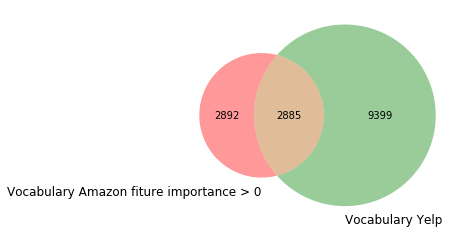

In [46]:
venn2(subsets = (len(Vocabulary_Importance_Amazon_Train), len(Vocabulary_Train_Yelp), len(Vocabulary_intersection)), set_labels = ('Vocabulary Amazon fiture importance > 0', 'Vocabulary Yelp'))

In [47]:
vectorizer_intersection_yelp = TfidfVectorizer(vocabulary = Vocabulary_intersection, ngram_range=(2,3),analyzer = 'char')
vectorizer_intersection_yelp.fit(Clean_Yelp_Sentiment_Train)

Vocabulary_Intersection_Train = vectorizer_intersection_yelp.get_feature_names()
Data_Train_Intersection = vectorizer_intersection_yelp.transform(Clean_Yelp_Sentiment_Train).toarray()
Data_Test_Intersection = vectorizer_intersection_yelp.transform(Clean_Yelp_Sentiment_Test).toarray()

# tf = tfidfvectorizer()
# tf.fit(train)
# trainx = tf.transform(train)
# testx = tf.transform(test)

In [48]:
DataFrame_Intersection_Train = pd.DataFrame(Data_Train_Intersection, columns = Vocabulary_Intersection_Train)
print(DataFrame_Intersection_Train)

      c i  rno       ash   zi       one       s w       ork  ito  xtr  \
0     0.0  0.0  0.000000  0.0  0.030027  0.000000  0.000000  0.0  0.0   
1     0.0  0.0  0.020607  0.0  0.020987  0.000000  0.049182  0.0  0.0   
2     0.0  0.0  0.019396  0.0  0.039507  0.019507  0.000000  0.0  0.0   
3     0.0  0.0  0.035687  0.0  0.018173  0.017946  0.000000  0.0  0.0   
4     0.0  0.0  0.000000  0.0  0.026942  0.026606  0.000000  0.0  0.0   
...   ...  ...       ...  ...       ...       ...       ...  ...  ...   
7495  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.000000  0.0  0.0   
7496  0.0  0.0  0.000000  0.0  0.021536  0.042534  0.000000  0.0  0.0   
7497  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.000000  0.0  0.0   
7498  0.0  0.0  0.000000  0.0  0.000000  0.000000  0.000000  0.0  0.0   
7499  0.0  0.0  0.000000  0.0  0.000000  0.013167  0.000000  0.0  0.0   

          ft   ...  dd        xpe       opl  obs        pr  dth  smi  rbo  \
0     0.03764  ...  0.0  0.015252  0.000000  0

# Akurasi interseksi yelp dan amazon (FI)

In [49]:
waktu_training_interseksi = time()
RF_Classifier_Yelp_intersec = RandomForestClassifier(max_depth= 5, n_estimators = 800, random_state=42,
                                       bootstrap = False, min_samples_split = 5, min_samples_leaf = 1, max_features = 'auto')
RF_Classifier_Yelp_intersec.fit(Data_Train_Intersection, Label_Yelp_Train)
print(f"\nWaktu Training data interseksi Only: {round(time()-waktu_training_interseksi, 3)}s")


Waktu Training data interseksi Only: 63.098s


In [50]:
Waktu_Predict_Train = time()
Skor_Train_Interseksi_Yelp = RF_Classifier_Yelp_intersec.score(Data_Train_Intersection, Label_Yelp_Train)
print(f"waktu prediksi (train): {round(time()-Waktu_Predict_Train, 3)}s")

Waktu_Predict_Test = time()
Skor_Test_Interseksi_Yelp = RF_Classifier_Yelp_intersec.score(Data_Test_Intersection, Label_Yelp_Test)
print(f"waktu prediksi (test): {round(time()-Waktu_Predict_Test, 3)}s")

print("\nSkor Random Forest Train Interseksi : {}".format(Skor_Train_Interseksi_Yelp))
print("Skor Random Forest Test Interseksi : {}".format(Skor_Test_Interseksi_Yelp))
print("----------------------------------------------------\n\n")
RFC_predict = RF_Classifier_Yelp_intersec.predict(Data_Train_Intersection)
Confusion_matrix = confusion_matrix(Label_Yelp_Train, RFC_predict)
print(Confusion_matrix)
print("\nAccuracy Train: ", accuracy_score(Label_Yelp_Train, RFC_predict))
print("\n")
print(metrics.classification_report(Label_Yelp_Train, RFC_predict))

print("----------------------------------------------------\n\n")
RFC_predict = RF_Classifier_Yelp_intersec.predict(Data_Test_Intersection)
Confusion_matrix = confusion_matrix(Label_Yelp_Test, RFC_predict)
print(Confusion_matrix)
print("\nAccuracy Test: ", accuracy_score(Label_Yelp_Test, RFC_predict))
print("\n")
print(metrics.classification_report(Label_Yelp_Test, RFC_predict))

waktu prediksi (train): 1.451s
waktu prediksi (test): 0.515s

Skor Random Forest Train Interseksi : 0.8750666666666667
Skor Random Forest Test Interseksi : 0.8468
----------------------------------------------------


[[3251  499]
 [ 438 3312]]

Accuracy Train:  0.8750666666666667


              precision    recall  f1-score   support

           0       0.88      0.87      0.87      3750
           1       0.87      0.88      0.88      3750

    accuracy                           0.88      7500
   macro avg       0.88      0.88      0.88      7500
weighted avg       0.88      0.88      0.88      7500

----------------------------------------------------


[[1068  182]
 [ 201 1049]]

Accuracy Test:  0.8468


              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1250
           1       0.85      0.84      0.85      1250

    accuracy                           0.85      2500
   macro avg       0.85      0.85      0.85      2500
weighted 

# Mengetahui akurasi dengan hanya mengambil Data Train Yelp yang diseleksi dengan data amazon feature importance > 0

In [51]:
# Meseleksi jika terdapat term yang sama pada dictionary yelp dan amazon maka akan di cek apakah term tersebut, 
# memiliki feature importance > 0, jika tidak maka tidak akan dimasukan untuk data train selanjutnya  

In [52]:
Vocabulary_Seleksi_Yelp = []
iterator = 0
length = len(Vocabulary_Train_Yelp)

while iterator < length : 
#     jika interseksi dengan amazon dan bukan fitur importance maka vocab tidak dimasukan
    if  (Vocabulary_Train_Yelp[iterator] in Vocabulary_Train_Amazon) and (Vocabulary_Train_Yelp[iterator] not in Vocabulary_Importance_Amazon_Train) : 
        iterator = iterator + 1
        continue
        
    Vocabulary_Seleksi_Yelp.append(Vocabulary_Train_Yelp[iterator])
    iterator = iterator + 1

In [53]:
vectorizer_seleksi_yelp = TfidfVectorizer(vocabulary = Vocabulary_Seleksi_Yelp, ngram_range=(2,3),analyzer = 'char')
vectorizer_seleksi_yelp.fit(Clean_Yelp_Sentiment_Train)

Vocabulary_Seleksi_Yelp_Train = vectorizer_seleksi_yelp.get_feature_names()
Data_Train_Seleksi_Yelp = vectorizer_seleksi_yelp.transform(Clean_Yelp_Sentiment_Train).toarray()
Data_Test_Seleksi_Yelp = vectorizer_seleksi_yelp.transform(Clean_Yelp_Sentiment_Test).toarray()

# tf = tfidfvectorizer()
# tf.fit(train)
# trainx = tf.transform(train)
# testx = tf.transform(test)

In [54]:
DataFrame_Seleksi = pd.DataFrame(Data_Train_Seleksi_Yelp, columns = Vocabulary_Seleksi_Yelp_Train)
print (DataFrame_Seleksi)

             a        a         ab        ac        ad        af   ag   ah  \
0     0.178855  0.050168  0.037623  0.000000  0.017962  0.015069  0.0  0.0   
1     0.143564  0.045021  0.013130  0.000000  0.037611  0.000000  0.0  0.0   
2     0.164673  0.056559  0.012371  0.047231  0.017719  0.000000  0.0  0.0   
3     0.194841  0.026025  0.022770  0.000000  0.000000  0.027360  0.0  0.0   
4     0.064192  0.038583  0.000000  0.000000  0.000000  0.000000  0.0  0.0   
...        ...       ...       ...       ...       ...       ...  ...  ...   
7495  0.111234  0.033429  0.000000  0.000000  0.000000  0.000000  0.0  0.0   
7496  0.166405  0.046163  0.000000  0.000000  0.000000  0.000000  0.0  0.0   
7497  0.048004  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0   
7498  0.066243  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0   
7499  0.174724  0.085925  0.016706  0.000000  0.000000  0.020074  0.0  0.0   

       ai        al  ...  zy   zyb  zye  zyl  zyn  zyy   zz  zz

In [55]:
waktu_training_seleksi_yelp = time()
RF_Classifier_Yelp_Seleksi = RandomForestClassifier(max_depth= 5, n_estimators = 800, random_state=42,
                                       bootstrap = False, min_samples_split = 5, min_samples_leaf = 1, max_features = 'auto')
RF_Classifier_Yelp_Seleksi.fit(Data_Train_Seleksi_Yelp, Label_Yelp_Train)
print(f"\nWaktu Training data seleksi: {round(time()-waktu_training_seleksi_yelp, 3)}s")



Waktu Training data seleksi: 66.868s


In [56]:
Waktu_Predict_Train = time()
Skor_Train_Seleksi_Yelp = RF_Classifier_Yelp_Seleksi.score(Data_Train_Seleksi_Yelp, Label_Yelp_Train)
print(f"waktu prediksi (train): {round(time()-Waktu_Predict_Train, 3)}s")

Waktu_Predict_Test = time()
Skor_Test_Seleksi_Yelp = RF_Classifier_Yelp_Seleksi.score(Data_Test_Seleksi_Yelp, Label_Yelp_Test)
print(f"waktu prediksi (test): {round(time()-Waktu_Predict_Test, 3)}s")

print("\nSkor Random Forest Train Seleksi : {}".format(Skor_Train_Seleksi_Yelp))
print("Skor Random Forest Test Seleksi : {}".format(Skor_Test_Seleksi_Yelp))

print("----------------------------------------------------\n\n")
RFC_predict = RF_Classifier_Yelp_Seleksi.predict(Data_Train_Seleksi_Yelp)
Confusion_matrix = confusion_matrix(Label_Yelp_Train, RFC_predict)
print(Confusion_matrix)
print("\nAccuracy Test: ", accuracy_score(Label_Yelp_Train, RFC_predict))
print("\n")
print(metrics.classification_report(Label_Yelp_Train, RFC_predict))

print("----------------------------------------------------\n\n")
RFC_predict = RF_Classifier_Yelp_Seleksi.predict(Data_Test_Seleksi_Yelp)
Confusion_matrix = confusion_matrix(Label_Yelp_Test, RFC_predict)
print(Confusion_matrix)
print("\nAccuracy TEST: ", accuracy_score(Label_Yelp_Test, RFC_predict))
print("\n")
print(metrics.classification_report(Label_Yelp_Test, RFC_predict))

waktu prediksi (train): 1.292s
waktu prediksi (test): 0.434s

Skor Random Forest Train Seleksi : 0.8750666666666667
Skor Random Forest Test Seleksi : 0.8444
----------------------------------------------------


[[3224  526]
 [ 411 3339]]

Accuracy Test:  0.8750666666666667


              precision    recall  f1-score   support

           0       0.89      0.86      0.87      3750
           1       0.86      0.89      0.88      3750

    accuracy                           0.88      7500
   macro avg       0.88      0.88      0.88      7500
weighted avg       0.88      0.88      0.88      7500

----------------------------------------------------


[[1058  192]
 [ 197 1053]]

Accuracy TEST:  0.8444


              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1250
           1       0.85      0.84      0.84      1250

    accuracy                           0.84      2500
   macro avg       0.84      0.84      0.84      2500
weighted avg    

In [57]:
from joblib import dump, load

In [58]:
dump(RF_Classifier_Yelp_Seleksi, 'RF_seleksi.joblib')

['RF_seleksi.joblib']

In [60]:
from joblib import dump, load
dump(vectorizer_seleksi_yelp, 'vectroizer_seleksi.joblib')

['vectroizer_seleksi.joblib']

In [78]:
data_train_tes = pd.read_csv('tes.csv')

In [79]:
print(data_train_tes.head())

                                           sentiment
0  Buyer beware This is a self-published book, an...
1  The Worst! A complete waste of time. Typograph...
2  Oh please I guess you have to be a romance nov...
3  Awful beyond belief! I feel I have to write to...
4  Another Abysmal Digital Copy Rather than scrat...


In [87]:
dfprint = pd.DataFrame()
dfprint['COMMENT'] = data_train_tes.sentiment

In [90]:
text_baru = dfprint['COMMENT'].astype(str)    
text_baru = text_baru.apply(lambda x: x.lower()) #Lower Case
text_baru = text_baru.apply(lambda x: re.sub(r"\d", "", x)) #Remove Number    
text_baru = text_baru.apply(lambda x: x.translate(str.maketrans('','',string.punctuation))) #punctuation  
text_baru = text_baru.apply(lambda x: " ".join(re.findall("[a-zA-Z]+", x)))   

In [89]:
print(text_baru[0])

buyer beware this is a selfpublished book and if you want to know whyread a few paragraphs those  star reviews must have been written by ms haddons family and friendsor perhaps by herself i cant imagine anyone reading the whole thingi spent an evening with the book and a friend and we were in hysterics reading bits and pieces of it to one another it is most definitely bad enough to be entered into some kind of a worst book contest i cant believe amazon even sells this kind of thing maybe i can offer them my th grade term paper on to kill a mockingbirda book i am quite sure ms haddon never heard of anyway unless you are in a mood to send a book to someone as a jokestay far far away from this one


In [91]:
print (text_baru[0])

buyer beware this is a selfpublished book and if you want to know whyread a few paragraphs those star reviews must have been written by ms haddons family and friendsor perhaps by herself i cant imagine anyone reading the whole thingi spent an evening with the book and a friend and we were in hysterics reading bits and pieces of it to one another it is most definitely bad enough to be entered into some kind of a worst book contest i cant believe amazon even sells this kind of thing maybe i can offer them my th grade term paper on to kill a mockingbirda book i am quite sure ms haddon never heard of anyway unless you are in a mood to send a book to someone as a jokestay far far away from this one


In [92]:
print(data_train_tes.sentiment[0])

Buyer beware This is a self-published book, and if you want to know why--read a few paragraphs! Those 5 star reviews must have been written by Ms. Haddon's family and friends--or perhaps, by herself! I can't imagine anyone reading the whole thing--I spent an evening with the book and a friend and we were in hysterics reading bits and pieces of it to one another. It is most definitely bad enough to be entered into some kind of a "worst book" contest. I can't believe Amazon even sells this kind of thing. Maybe I can offer them my 8th grade term paper on "To Kill a Mockingbird"--a book I am quite sure Ms. Haddon never heard of. Anyway, unless you are in a mood to send a book to someone as a joke---stay far, far away from this one!


In [93]:
cols = "``".join([str(i) for i in data_train_tes.columns.tolist()])

In [94]:
print(cols)

sentiment


In [95]:
print(data_train_tes[cols][0])

Buyer beware This is a self-published book, and if you want to know why--read a few paragraphs! Those 5 star reviews must have been written by Ms. Haddon's family and friends--or perhaps, by herself! I can't imagine anyone reading the whole thing--I spent an evening with the book and a friend and we were in hysterics reading bits and pieces of it to one another. It is most definitely bad enough to be entered into some kind of a "worst book" contest. I can't believe Amazon even sells this kind of thing. Maybe I can offer them my 8th grade term paper on "To Kill a Mockingbird"--a book I am quite sure Ms. Haddon never heard of. Anyway, unless you are in a mood to send a book to someone as a joke---stay far, far away from this one!
